In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,Y = make_blobs(n_features = 2,n_samples = 50,cluster_std = 5,centers = 2)

In [4]:
Y

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0])

In [5]:
X[:5]

array([[ -4.92024377,  -5.03663522],
       [ -5.45187715,  -7.50773951],
       [-11.63329576, -10.49809523],
       [-19.18487748,  -5.78423149],
       [-16.25205041,   1.46482202]])

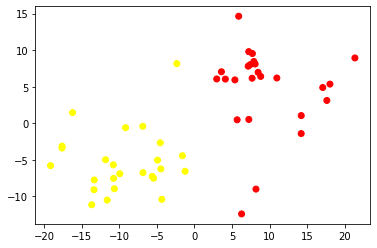

In [6]:
plt.scatter(x=X[:,0],y=X[:,1],c =Y,cmap = 'autumn')

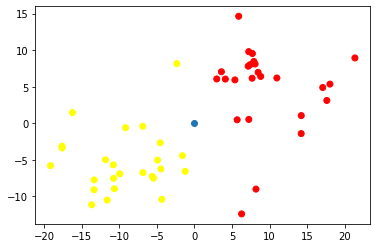

In [7]:
#here we added a datapoint with coordinates [0,0], and next step we have to detemine the 
#class(ie, red or yellow) of the datapoint using nearest neighbour algo
plt.scatter(x=X[:,0],y=X[:,1],c =Y,cmap = 'autumn')
plt.scatter(x=[0],y=[0])

In [8]:
Y[:5]

array([1, 1, 1, 1, 1])

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knc = KNeighborsClassifier(n_neighbors=5)

In [11]:
knc.fit(X,Y)

KNeighborsClassifier()

In [12]:
knc.predict([[0,0]])

array([1])

In [13]:
knc.predict([[10,0]])

array([0])

In [14]:
knc.predict([[-10,0]])

array([1])

In [15]:
neighbors = knc.kneighbors([[0,0]])

In [16]:
neighbors

(array([[4.70732823, 5.28289074, 5.70578863, 6.67796319, 6.75065725]]),
 array([[ 9, 22, 36, 41, 47]], dtype=int64))

In [17]:
neighbors= X[[22, 20, 37, 30, 36]]

In [18]:
neighbors

array([[ -4.56110769,  -2.66556394],
       [ -9.96087755,  -6.90029079],
       [  3.59201938,   7.04925748],
       [-10.81802178,  -5.67849301],
       [  5.68545367,   0.48129039]])

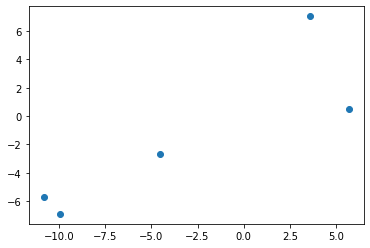

In [19]:
plt.scatter(neighbors[:,0],neighbors[:,1])

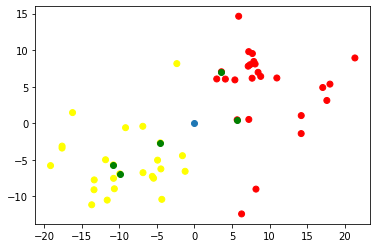

In [20]:
plt.scatter(x=X[:,0],y=X[:,1],c =Y,cmap = 'autumn')
plt.scatter(x=[0],y=[0])
plt.scatter(neighbors[:,0],neighbors[:,1],c='g')

In [21]:
#Nearest neighbors regressor
from sklearn.datasets import make_regression

In [22]:
X,Y = make_regression(n_features=2,n_samples=50)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
knr = KNeighborsRegressor(n_neighbors=5)

In [25]:
knr.fit(X,Y)

KNeighborsRegressor()

In [26]:
neighbors = knr.kneighbors([[0,0]])
neighbors

(array([[0.14110146, 0.16230976, 0.41100354, 0.50984218, 0.51881297]]),
 array([[12, 20, 35, 40,  2]], dtype=int64))

In [27]:
neighbors = X[[37, 14, 24, 29, 25]]

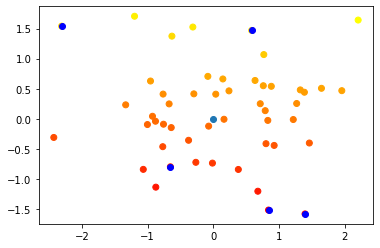

In [28]:
plt.scatter(x=X[:,0],y=X[:,1],c = Y,cmap = 'autumn')
plt.scatter(x=[0],y=[0])
plt.scatter(neighbors[:,0],neighbors[:,1],c='b')

In [29]:
import numpy as np

In [30]:
np.mean(Y[[37, 14, 24, 29, 25]])

-8.112602001295377

In [31]:
np.median(Y[[37, 14, 24, 29, 25]])

-38.326496944378974

In [32]:
knr.predict([[0,0]])

array([2.68994618])

In [33]:
#Data Preprocessing

In [34]:
import pandas as pd

In [13]:
house_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt', index_col='Unnamed: 0')

In [36]:
house_data.head(5)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


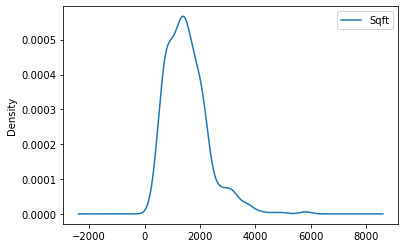

In [37]:
house_data[['Sqft']].plot.kde()

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
mm = MinMaxScaler()

In [40]:
feature_data = house_data.drop(columns = ['Price'])
feature_data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
1,1177.698,2,7,2,2,2
2,2134.800,5,7,4,2,2
3,1138.560,5,7,2,2,1
4,1458.780,2,7,3,2,2
5,967.776,11,14,3,2,2


In [41]:
target_data=house_data['Price']
target_data.head()

1    62000
2    78000
3    58000
4    45000
5    45000
Name: Price, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
trainX,testX,trainY,testY = train_test_split(feature_data,target_data)

In [44]:
mm = MinMaxScaler()

In [45]:
mm.fit(trainX)

MinMaxScaler()

In [46]:
mm.data_min_

array([359.358,   1.   ,   3.   ,   1.   ,   0.   ,   0.   ])

In [47]:
mm.data_max_

array([5.856468e+03, 2.100000e+01, 3.800000e+01, 7.000000e+00,
       3.000000e+00, 5.000000e+00])

In [48]:
mm.data_range_

array([5.49711e+03, 2.00000e+01, 3.50000e+01, 6.00000e+00, 3.00000e+00,
       5.00000e+00])

In [49]:
trainX_tf = mm.transform(trainX)

In [50]:
testX_tf = mm.transform(testX) # We transformed trainX and testX to same scale and trained(mm.fit) trainX dataset.And predicts for testX

In [51]:
knr = KNeighborsRegressor()

In [52]:
knr.fit(trainX_tf,trainY)

KNeighborsRegressor()

In [53]:
predictions = knr.predict(testX_tf)

In [54]:
pd.DataFrame({'Actual':testY,'Prediction':predictions})[:5]

,Actual,Prediction
475,98000,63799.8
8,48000,40160.0
470,50000,53000.0
43,36000,42800.0
633,45000,65600.0


In [55]:
knr.score(testX_tf,testY)

0.6397006095698676

In [56]:
from sklearn.datasets import fetch_olivetti_faces

In [57]:
faces = fetch_olivetti_faces()

In [58]:
faces.images.shape

(400, 64, 64)

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
faces.images[0].shape

(64, 64)

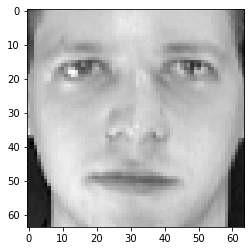

In [61]:
plt.imshow(faces.images[0],cmap = 'gray')

In [62]:
train_data = faces.images[faces.target <30]

In [63]:
test_data = faces.images[faces.target>=30]

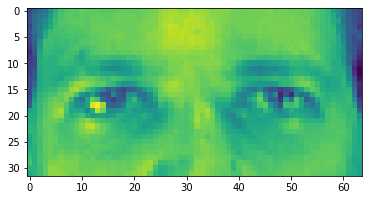

In [64]:
plt.imshow(train_data[0][:32])

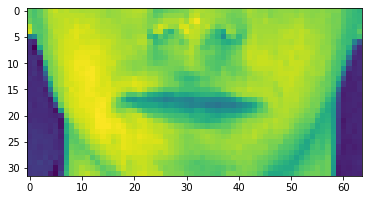

In [65]:
plt.imshow(train_data[0][32:])

ML Algo don't accept 3D data but only 2D data
Reshape below does this for us

In [66]:
train_data.shape

(300, 64, 64)

In [67]:
trainX = train_data[:,:32,:].reshape(300,(32*64))

In [68]:
trainY = train_data[:,32:,:].reshape(300,(32*64))

In [69]:
test_data.shape

(100, 64, 64)

In [70]:
testX = test_data[:,:32,:].reshape(100,32*64)

In [71]:
testY = test_data[:,32:,:].reshape(100,32*64)

In [72]:
from sklearn.neighbors import KNeighborsRegressor

In [73]:
knr = KNeighborsRegressor(n_neighbors=5, n_jobs=-1) #n_jobs = -1, making use of all CPU cores

In [74]:
knr.fit(trainX,trainY)

KNeighborsRegressor(n_jobs=-1)

In [75]:
pred_face = knr.predict(testX[:1])

In [76]:
bottom_face = pred_face.reshape(32,64)

In [77]:
import numpy as np

In [78]:
combined_face = np.vstack([testX[0].reshape(32,64),bottom_face])

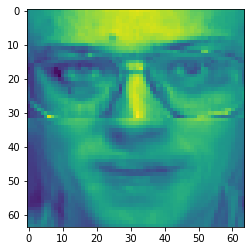

In [79]:
plt.imshow(combined_face)

In [80]:
import pandas as pd

In [86]:
bank_data = pd.read_csv("E:/DataScience/Data/bank.csv", sep = ';')

In [87]:
bank_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [1]:
import pandas as pd
import numpy as np

In [10]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [14]:
df['type'] = iris.target

In [10]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
66,5.6,3.0,4.5,1.5,1
64,5.6,2.9,3.6,1.3,1
121,5.6,2.8,4.9,2.0,2
102,7.1,3.0,5.9,2.1,2
80,5.5,2.4,3.8,1.1,1


In [24]:
class MyKNN:
    def __init__(self,k=None):
        self.k = k
    
    def my_fit(self,feature_data,target_data):
        self.feature_data = np.array(feature_data)
        self.target_data = np.array(target_data)
        
    def calculate_distance_vector_matrix(self,new_data):
        distance_matrix = np.sqrt(np.sum(np.square(self.feature_data - new_data),axis = 1))
        return distance_matrix
    
    def find_k_neighbours(self,new_data):
        dist_matrix = self.calculate_distance_vector_matrix(new_data)
        return dist_matrix.argsort()[:self.k]
    
    def find_k_neighbours_class(self,new_data):
        neighbours_index = self.find_k_neighbours(new_data)
        return self.target_data[neighbours_index]
    
    def my_predict(self,new_data):
        class_list = self.find_k_neighbours_class(new_data)
        return np.bincount(class_list).argmax()

In [25]:
model = MyKNN(5)

In [15]:
feature_data = df.drop(columns=['type'],axis = 1)
feature_data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
target_data = df['type']

In [27]:
model.my_fit(feature_data,target_data)

In [20]:
model.calculate_distance_vector_matrix([1,2,3,4])

array([6.00499792, 5.76281181, 5.69736781, 5.55517776, 5.96322061,
       6.13351449, 5.58300994, 5.88642506, 5.41940956, 5.82065288,
       6.2401923 , 5.72712843, 5.76281181, 5.5416604 , 6.6873014 ,
       6.56201189, 6.2305698 , 5.94222181, 6.38043886, 5.99916661,
       6.11964051, 5.9084685 , 5.82752091, 5.69561235, 5.66127194,
       5.77927331, 5.73410847, 6.04814021, 6.04979338, 5.61515806,
       5.66127194, 6.04400529, 6.28569805, 6.48768063, 5.75412895,
       5.92621296, 6.31110133, 5.96154342, 5.46717477, 5.95482997,
       5.90169467, 5.37773186, 5.50726793, 5.63648827, 5.84978632,
       5.62938718, 6.03738354, 5.60357029, 6.17008914, 5.88982173,
       6.86221539, 6.25299928, 6.77347769, 5.35070089, 6.3007936 ,
       5.68066897, 6.1991935 , 4.94570521, 6.48228355, 5.06951674,
       5.02493781, 5.71839138, 5.91945943, 6.03903966, 5.44242593,
       6.5130638 , 5.53714728, 5.80861429, 5.96489732, 5.53443764,
       5.79050948, 5.91100668, 6.18061486, 6.11391855, 6.24099

In [21]:
model.find_k_neighbours([1,2,3,4])

array([106,  57,  93,  60,  98], dtype=int64)

In [22]:
model.find_k_neighbours_class([1,2,3,4])

array([2, 1, 1, 1, 1])

In [28]:
model.my_predict([1,2,3,4])

1

In [29]:
model.my_predict([4,4,4,4])

2

In [2]:
class MyKNNRegressor:
    def __init__(self,k=None):
        self.k = k
    
    def my_fit(self,feature_data,target_data):
        self.feature_data = np.array(feature_data)
        self.target_data = np.array(target_data)
        
    def calculate_distance_vector_matrix(self,new_data):
        distance_matrix = np.sqrt(np.sum(np.square(self.feature_data - new_data),axis = 1))
        return distance_matrix
    
    def find_k_neighbours(self,new_data):
        dist_matrix = self.calculate_distance_vector_matrix(new_data)
        return dist_matrix.argsort()[:self.k]
    
    def find_k_neighbours_class(self,new_data):
        neighbours_index = self.find_k_neighbours(new_data)
        return self.target_data[neighbours_index]
    
    def my_predict(self,new_data):
        class_list = self.find_k_neighbours_class(new_data)
        return np.mean(class_list)

In [3]:
knr = MyKNNRegressor(5)

In [8]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['type'] = iris.target

In [9]:
feature_data = df.drop(columns=['type'],axis = 1)
target_data = df['type']

In [11]:
knr.my_fit(feature_data,target_data)

In [12]:
knr.my_predict([4,4,4,4])

1.6

In [15]:
house_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt', index_col='Unnamed: 0')

In [16]:
feature_data = house_data.drop(columns = ['Price'])
feature_data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
1,1177.698,2,7,2,2,2
2,2134.800,5,7,4,2,2
3,1138.560,5,7,2,2,1
4,1458.780,2,7,3,2,2
5,967.776,11,14,3,2,2


In [17]:
target_data=house_data['Price']
target_data.head()

1    62000
2    78000
3    58000
4    45000
5    45000
Name: Price, dtype: int64

In [19]:
knr = MyKNNRegressor(5)

In [21]:
knr.my_fit(feature_data,target_data)

In [25]:
knr.my_predict([1300,2,7,3,2,2])

45900.0